# <center>🫀<font color='red'> *Heart Diseases Dataset Overview*</font>🫀

*This dataset contains clinical and demographic information of patients and is designed to predict the presence of heart disease.*
*The target variable (target) is binary:*
*0 → No heart disease*
*1 → Presence of heart disease*
*Therefore, this problem is a binary classification task.*

### <font color='watermelon'>*♥️Feature Description*</font>  
*The dataset includes a mix of numerical, categorical, and binary variables describing patient health conditions and medical test results.*

##### <font color='Brinkpink'>*♥️Demographic Features*</font> 
* **age**: *Age of the patient (in years)*
* **sex**: *Gender (0 = male, 1 = female)*

##### <font color='Brink pink'>*♥️Clinical and Medical Test Features*</font> 
* **cp** *:  Chest pain type (4 categories: typical angina, atypical angina, non-anginal pain, asymptomatic)*
* **trestbps** *: Resting blood pressure (mm Hg)*
* **chol** *: Serum cholesterol (mg/dl)*
* **fbs** *: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)*
* **restecg** *: Resting electrocardiographic results*
* **thalach** *: Maximum heart rate achieved*
* **exang** *: Exercise-induced angina (1 = yes, 0 = no)*
* **oldpeak** *: ST depression induced by exercise*
* **slope** *: Slope of the peak exercise ST segment*
* **ca** *: Number of major vessels (0–4) colored by fluoroscopy*
* **thal** *: Thalassemia test result*

### <font color='watermelon'>*🎯Objective of the EDA*</font>  
*The goal of the Exploratory Data Analysis (EDA) is to:*
*1. Understand the structure and distribution of the dataset*
*2. Examine class balance in the target variable*
*3. Analyze the distribution of numerical and categorical features*
*4. Detect potential outliers*
*5. Investigate correlations between features*
*6. Explore relationships between features and the target variable*
*7. Conducting EDA helps identify meaningful patterns, potential predictive features, and data quality issues before building machine learning models.*

In [236]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import missingno as msno
import itertools
import math

In [237]:
Data = pd.read_csv("D:/data science/heart.csv")
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [238]:
Df=pd.DataFrame(Data)
Df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [239]:
Df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<font color='lightcoral'> **All variables are numeric, with no object-type features present. The dataset consists of 303 observations and 14 variables, indexed from 0 to 302.** 

In [240]:
Df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [241]:
def describe_dataset(Df):
    summary = {
        'Variable': Df.columns,
        'Dtype': Df.dtypes.values,
        'Count': Df.count().values,
        'Unique': Df.nunique().values,
        'Missing value': Df.isna().sum().values
    }
    return pd.DataFrame(summary)

*<font color='lightcoral'> The results are shown in the next section.*
*Using this output, we can extract useful information about the dataset, such as the data type, count, number of unique values, and missing values.</font>*

In [242]:
describe_dataset(Df)

,Variable,Dtype,Count,Unique,Missing value
0,age,int64,303,41,0
1,sex,int64,303,2,0
2,cp,int64,303,4,0
3,trestbps,int64,303,49,0
4,chol,int64,303,152,0
5,fbs,int64,303,2,0
6,restecg,int64,303,3,0
7,thalach,int64,303,91,0
8,exang,int64,303,2,0
9,oldpeak,float64,303,40,0


In [243]:
percent_missing = Df.isnull().sum()*100 / len(Df)
missing_value_df = pd.DataFrame({'column_name': Df.columns,
                                 'percent_missing': percent_missing})
percent = pd.DataFrame(missing_value_df)
percent

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


In [244]:
for column in Df.columns:
    print(f"Unique valuses in '{column}':")
    print(Df[column].unique())
    print("_"*50)

Unique valuses in 'age':
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
__________________________________________________
Unique valuses in 'sex':
[1 0]
__________________________________________________
Unique valuses in 'cp':
[3 2 1 0]
__________________________________________________
Unique valuses in 'trestbps':
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
__________________________________________________
Unique valuses in 'chol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244

# *<center><font color='firebrick'>Data Prepration*

In [245]:
Df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [246]:
for column in Df.columns:
    print (F"Value counts for '{column}':")
    print (Df[column].value_counts())
    print('_'*50)

Value counts for 'age':
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
__________________________________________________
Value counts for 'sex':
sex
1    207
0     96
Name: count, dtype: int64
__________________________________________________
Value counts for 'cp':
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
__________________________________________________
Value counts for 'trestbps':
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180   

In [247]:
Df.shape

(303, 14)

In [248]:
Df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [249]:
Df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

# *<center><center><font color='firebrick'>Outlier Detection*

In [250]:
Df.duplicated().sum()

np.int64(1)

In [251]:
Df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [252]:
Df = Df.drop_duplicates().reset_index(drop=True)

In [253]:
Df.isna().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [254]:
Df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [255]:
zero_values = (Df["thal"] == 0).sum()
print(f"Number of zero values in 'thal': {zero_values}")

Number of zero values in 'thal': 2


In [256]:
percent_zero = (Df["thal"]==0).mean()*100
print(f"{percent_zero:.2f}% of the values in 'thal' are zero")

0.66% of the values in 'thal' are zero


<font color='lightcoral'>*number of zero data is less than 1%. so we do not consider those and won't drop columns.*

In [257]:
#Df.loc[Df["thal"]==0, "thal"]=pd.NA

↑
This line replaces all the zeros with NaN in the column thal.

In [258]:
#Df = Df.dropna(subset=["thal"]).reset_index(drop=True)

↑
This line drops all the lines that contains NAN values. (just like last cell)

*<font color='lightcoral'>Next, we examine the number of sick and non-sick individuals.*

In [259]:
target_count = Df["target"].value_counts()
target_count

target
1    164
0    138
Name: count, dtype: int64

In [260]:
target_percent = (target_count / target_count.sum() * 100).round(0)
print(target_percent)

target
1    54.0
0    46.0
Name: count, dtype: float64


*<font color='lightcoral'>This means that the target classes are very close to each other, so the dataset is well balanced.*

In [261]:
num_cols = ["age" , "trestbps" , "chol", "thalach", "oldpeak"]

Df[num_cols].describe

<bound method NDFrame.describe of      age  trestbps  chol  thalach  oldpeak
0     63       145   233      150      2.3
1     37       130   250      187      3.5
2     41       130   204      172      1.4
3     56       120   236      178      0.8
4     57       120   354      163      0.6
..   ...       ...   ...      ...      ...
297   57       140   241      123      0.2
298   45       110   264      132      1.2
299   68       144   193      141      3.4
300   57       130   131      115      1.2
301   57       130   236      174      0.0

[302 rows x 5 columns]>

*<font color='lightcoral'>We checked the dataset for unusual values or anomalies, and no issues were found.*

In [262]:
cat_cols = ["thal", "cp", "slope", "restecg", "ca"]

for col in cat_cols:
    print("\n")
    print(Df[col].value_counts())



thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64


cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


slope
2    141
1    140
0     21
Name: count, dtype: int64


restecg
1    151
0    147
2      4
Name: count, dtype: int64


ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


*<font color='lightcoral'> In this step, we examine the number of duplicate entries in the dataset*

*<font color='lightcoral'>The categorical features were analyzed using value counts to examine their distributions.*

*The thal feature shows a very rare category (value 0), which may require further inspection.*

*The cp and slope features show uneven but acceptable category distributions.*

*The restecg feature is well balanced across its categories.</font>*
<font color='lightcoral'>

*The ca feature shows a clearly imbalanced distribution across its categories. The majority of observations fall into category 0, while higher values (especially category 4) are extremely rare. This skewed distribution may require further inspection, as very small categories could affect model stability or generalization.</font>*

In [263]:
bin_cols = ["sex", "fbs", "exang" , "target"]

for col in bin_cols:
    print("\n")
    print(Df[col].value_counts())



sex
1    206
0     96
Name: count, dtype: int64


fbs
0    257
1     45
Name: count, dtype: int64


exang
0    203
1     99
Name: count, dtype: int64


target
1    164
0    138
Name: count, dtype: int64


*<font color='lightcoral'>Binary features were analyzed using value counts to examine class distributions.*

*The target variable is relatively balanced, while fbs shows a strong class imbalance.*
*
*(target is much important to choose this data for classification task)*

*The sex and exang variables exhibit moderate imbalance.*

In [264]:
Df[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


*<font color='lightcoral'>Conclusion (Based on the comparison of 75% and Max):*

*By comparing the 75th percentile with the maximum values, we can get a general idea of whether extreme values exist in the data.*

*For variables such as age and thalach, the maximum values are not much higher than the 75th percentile, which suggests that these features have a fairly stable distribution and do not contain obvious outliers.*

*On the other hand, variables like chol and oldpeak show a much larger difference between the 75th percentile and the maximum value. This indicates that there are some unusually high values in these features, and they are more likely to contain outliers.*

*As a result, these features may require further investigation using techniques such as boxplots or the IQR method to properly identify and handle potential outliers.*

*<font color='indianred'>By comparing the 75th percentile with the maximum values, we observe that age and thalach have relatively stable distributions with no clear extreme values.*
*In contrast, chol and oldpeak show a large gap between these statistics, indicating the presence of potential high-value outliers.*


In [265]:
Df["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

*we did this part again to remmember the importance of the result.*

*<font color='lightcoral'>Among the numerical features, thalach shows a moderate negative relationship with age. Other features such as cholesterol and resting blood pressure exhibit weak or no clear linear association with age.*

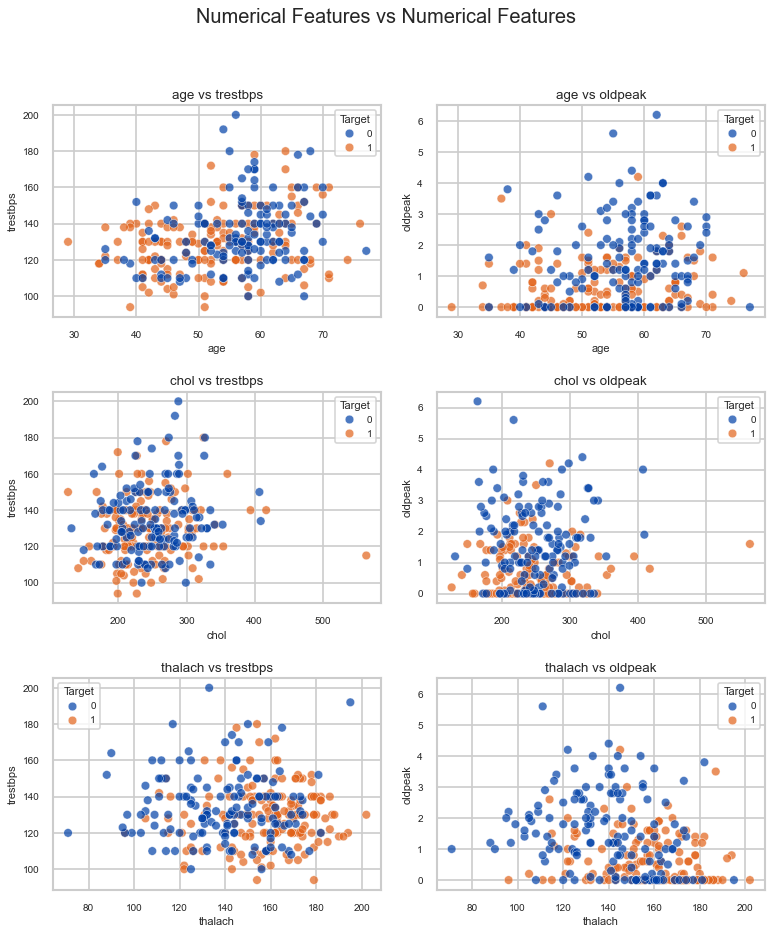

In [295]:
#numerical vs. numerical
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,12), dpi=80)

x_list = ['age', 'chol', 'thalach']
y_cols = ['trestbps', 'oldpeak']

for i, x in enumerate(x_list):
    for j, y in enumerate(y_cols):
        sns.scatterplot(data=Df,x=x ,y=y ,hue='target',palette=["#0040A7", "#E2631A"],alpha=0.7,s=60 ,edgecolor='white',linewidth=0.5 ,ax=ax[i, j])
        
        ax[i, j].set_title(f"{x} vs {y}", fontsize=12)
        ax[i, j].legend(title='Target', fontsize=9, title_fontsize=10, loc='best',frameon=True)
        ax[i, j].set_xlabel(x, fontsize=10)
        ax[i, j].set_ylabel(y, fontsize=10)
        ax[i, j].tick_params(axis='both', labelsize=9)

plt.suptitle('Numerical Features vs Numerical Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [267]:
Df[num_cols].corr()


,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


### *<center><font color='maroon'>Final remarks*

 *<font color='indianred'>most numerical features do not appear to have strong linear relationships with each other.The scatter plots show that the points are widely spread without a clear upward or downward pattern, suggesting that the correlations between these variables are generally weak.*

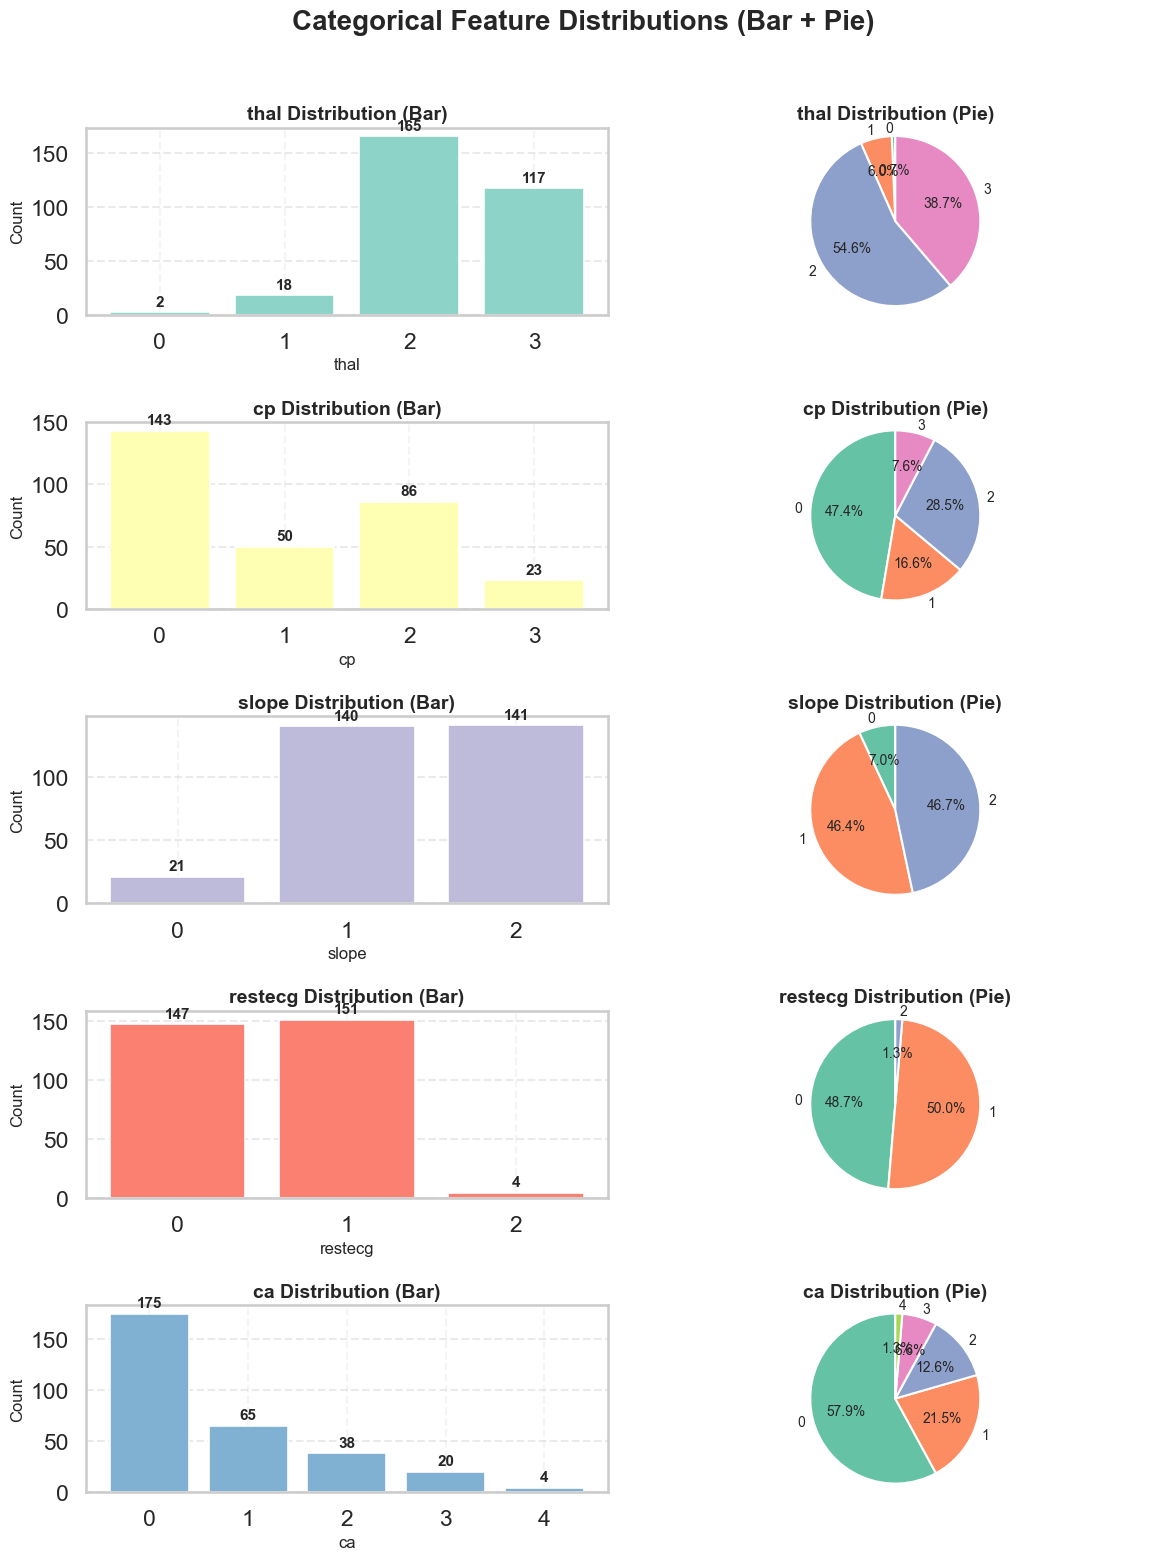

In [294]:
# Categorical distributions: Bar + Pie for each feature
n = len(cat_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 16), dpi=100)

if n == 1:
    axes = np.array([axes])

colors = sns.color_palette("Set3", n)

for i, col in enumerate(cat_cols):
    counts = Df[col].value_counts().sort_index()
    labels = counts.index.astype(str)
    values = counts.values

    # -------- Bar plot (left) --------
    ax_bar = axes[i, 0]
    bars = ax_bar.bar(labels, values, color=colors[i], linewidth=1.2)

    ax_bar.set_title(f"{col} Distribution (Bar)", fontsize=14, weight='bold')
    ax_bar.set_xlabel(col, fontsize=12)
    ax_bar.set_ylabel("Count", fontsize=12)

    for bar in bars:
        h = bar.get_height()
        ax_bar.text(bar.get_x() + bar.get_width()/2,h + max(values)*0.02,f"{int(h)}",ha="center",va="bottom",fontsize=11,weight="bold")

    ax_bar.grid(axis='y', linestyle='--', alpha=0.4)
    ax_bar.grid(axis='x', linestyle='--', alpha=0.2)

    # -------- Pie plot (right) --------
    ax_pie = axes[i, 1]
    pie_colors = sns.color_palette("Set2", len(labels))

    ax_pie.pie(values,labels=labels,autopct=lambda p: f"{p:.1f}%",startangle=90,colors=pie_colors,textprops={"fontsize": 10})
    ax_pie.set_title(f"{col} Distribution (Pie)", fontsize=14, weight='bold')
    ax_pie.axis('equal')

plt.suptitle("Categorical Feature Distributions (Bar + Pie)", fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

*1) The majority of individuals fall into category 2 (reversible defect),followed by category 3. Categories 0 and 1 are relatively rare.*

*2) Chest pain type 0 is the most common category,while type 3 is the least frequent.The distribution appears moderately imbalanced.*

*3) Most observations belong to slope categories 1 and 2,while category 0 is underrepresented.*

*4) Resting ECG categories 0 and 1 are almost equally represented, whereas category 2 is extremely rare.*
<font color='lightcoral'>


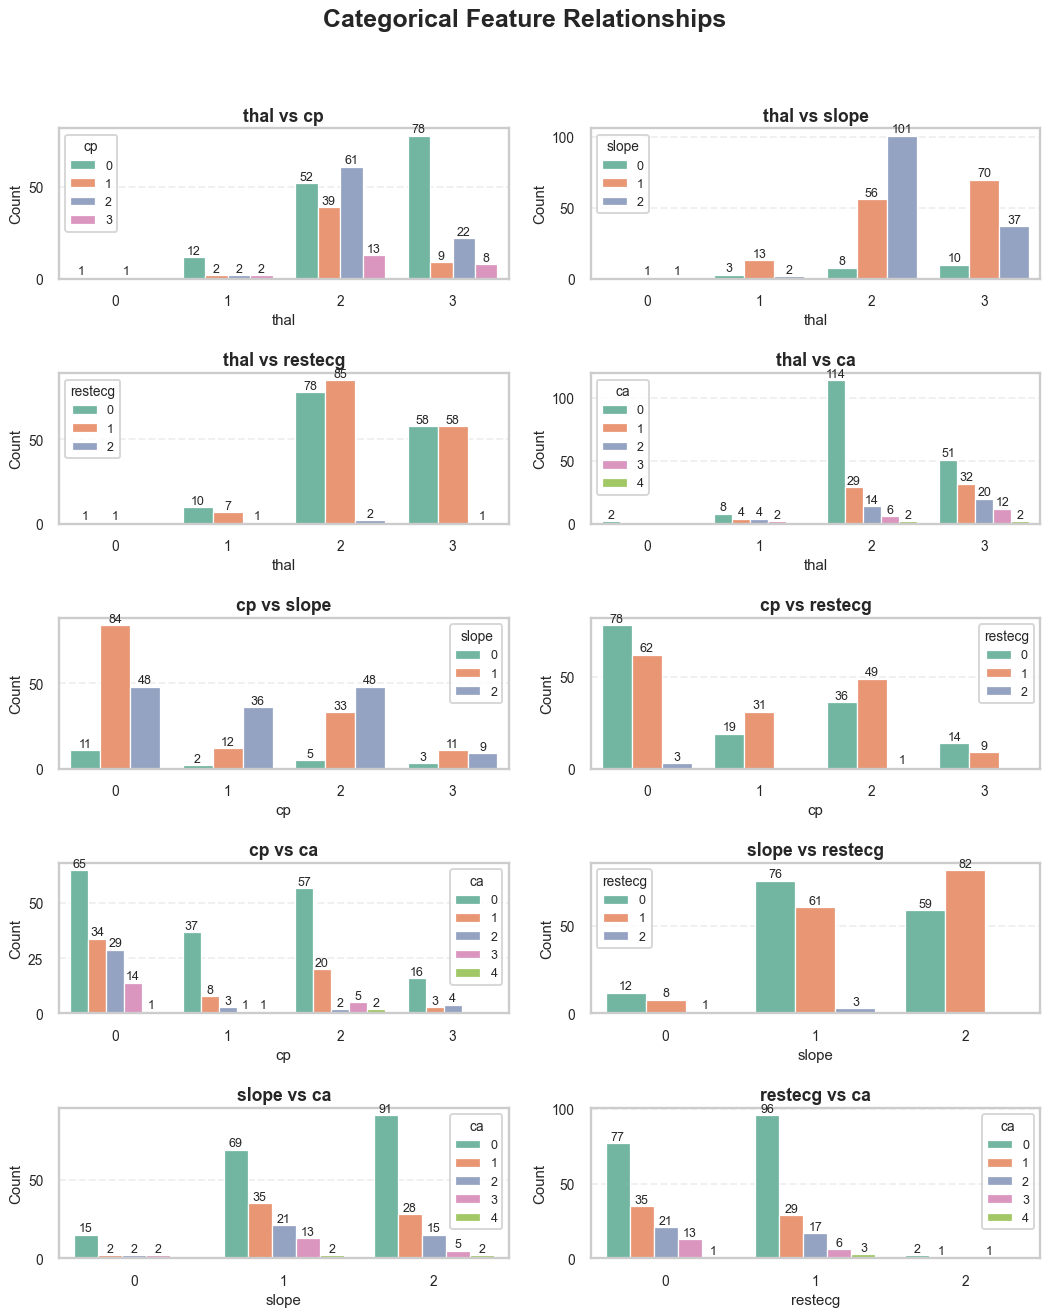

In [292]:
#categorical vs. categorical
sns.set_style("whitegrid")

cat_cols = ['thal', 'cp', 'slope', 'restecg','ca']
pairs = list(itertools.combinations(cat_cols, 2))

fig, ax = plt.subplots(5, 2, figsize=(12, 15), dpi=90)
ax = ax.flatten()

for i, (col1, col2) in enumerate(pairs):
    
    sns.countplot(data=Df, x=col1, hue=col2, palette="Set2",linewidth=1, ax=ax[i])
    ax[i].set_title(f"{col1} vs {col2}", fontsize=14, weight='bold')
    ax[i].set_xlabel(col1, fontsize=12)
    ax[i].set_ylabel("Count", fontsize=12)
    
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%d', fontsize=10)

    ax[i].grid(axis='y', linestyle='--', alpha=0.3)
    ax[i].legend(title=col2, title_fontsize=11, fontsize=10)
    for label in ax[i].get_xticklabels():
        label.set_fontsize(11)

    for label in ax[i].get_yticklabels():
        label.set_fontsize(11)



plt.suptitle("Categorical Feature Relationships", fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




>*The variable thal exhibits a noticeable class imbalance. Category 2 is the most dominant, representing the majority of observations in the dataset, while categories 0 and 1 are significantly underrepresented.*
*This uneven distribution indicates that most individuals fall into the reversible defect category, whereas some groups contain very few samples. Such imbalance may influence model performance, as rare categories provide limited data for the model to learn reliable patterns.*

>*The cp variable shows a moderately imbalanced distribution, with category 0 being the most frequent.*
*Based on the observed count plots, no strong or exclusive associations were identified between cp and other categorical variables.*
*The frequency patterns appear largely proportional to overall category distributions.*

>*The slope variable appears relatively balanced between categories 1 and 2, while category 0 is underrepresented.* 
*Based on visual inspection of categorical interactions, no strong or exclusive associations were observed between slope and other categorical variables.*
*The distribution patterns largely reflect overall category frequencies.*

>*The restecg variable is relatively balanced between categories 0 and 1, while category 2 is extremely underrepresented.*
*Based on visual inspection of categorical interactions, no strong or exclusive associations were identified between restecg and other categorical variables.* 
*Observed frequency patterns appear proportional to overall category distributions.*

>*The ca variable exhibits a clear class imbalance, with category 0 being the most dominant and representing the majority of observations in the dataset. Higher categories (especially 3 and 4) are considerably underrepresented, with category 4 appearing extremely rare.*

*This uneven distribution indicates that most individuals have no major vessels colored by fluoroscopy, while progressively fewer patients fall into higher vessel-count categories.*
*Based on visual inspection of categorical interactions, no strong or exclusive associations were identified between ca and other categorical variables. The observed frequency patterns largely reflect the overall imbalance of the ca categories rather than distinct interaction effects.*

<font color='red'>

### *<center><font color='maroon'>Final remarks*

<font color='lightcoral'>*Several categorical features show uneven distributions, with some categories occurring far less often than others. Such imbalances may impact the model’s ability to accurately learn from these rare groups.*

*overall there is no special relation between categorical features.*


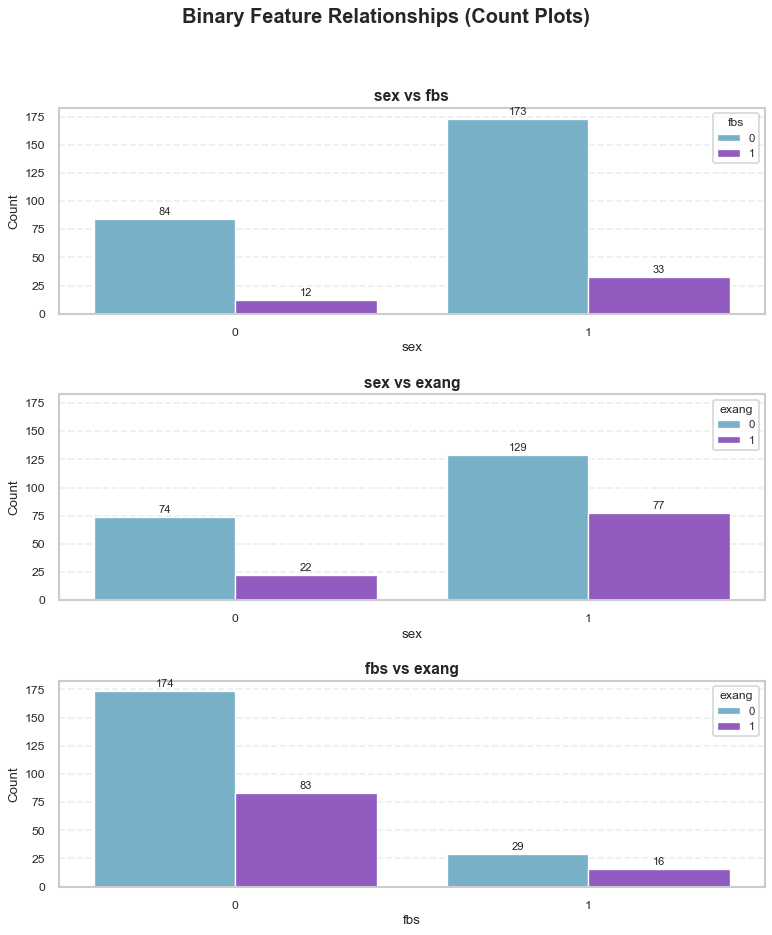

In [291]:
#binary vs. binary
sns.set_style("whitegrid")
sns.set_context("talk")

bin_cols_no_target = ["sex", "fbs", "exang"]
pairs = list(itertools.combinations(bin_cols_no_target, 2))

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), dpi=80, sharey=True)
ax = ax.flatten()
palette = ["#6AB6D4", "#944ad0"]

for i, (col1, col2) in enumerate(pairs):
    g = sns.countplot(data=Df, x=col1, hue=col2, palette=palette, edgecolor="white", linewidth=1.2, ax=ax[i])

    ax[i].set_title(f"{col1} vs {col2}", fontsize=14, weight="bold")
    ax[i].set_xlabel(col1, fontsize=12)
    ax[i].set_ylabel("Count", fontsize=12)
    ax[i].tick_params(axis="both", labelsize=11)

    for container in ax[i].containers:
        ax[i].bar_label(container, fmt="%d", fontsize=10, padding=2)
    ax[i].grid(axis="y", linestyle="--", alpha=0.35)
    ax[i].legend(title=col2, title_fontsize=11, fontsize=10, frameon=True)

plt.suptitle("Binary Feature Relationships (Count Plots)", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



>*Among the binary feature interactions, a moderate association appears between sex and exang.*
*However, sex vs fbs and fbs vs exang do not show strong or exclusive patterns.* 
*Most observed differences largely reflect overall category frequencies.*

C:\Users\AsuS\AppData\Local\Temp\ipykernel_41184\1213528706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.countplot(


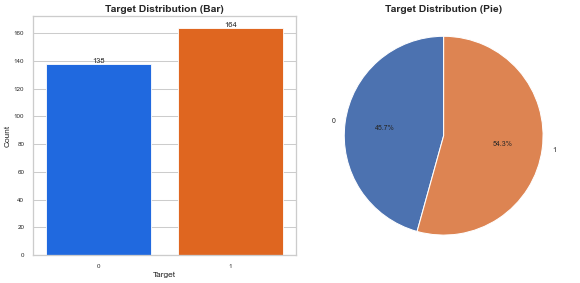

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=50)

# -------- Bar Plot --------
ax_bar = sns.countplot(
    data=Df,
    x='target',
    palette=["#0062FF", "#FF5E00"],
    edgecolor="white",
    linewidth=1.2,
    ax=axes[0]
)

axes[0].set_title("Target Distribution (Bar)", fontsize=15, weight='bold')
axes[0].set_xlabel("Target", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].tick_params(axis='both', labelsize=9)

for container in ax_bar.containers:
    ax_bar.bar_label(container, fmt='%d', fontsize=11)

# -------- Pie Plot --------
counts = Df['target'].value_counts().sort_index()
labels = counts.index.astype(str)

axes[1].pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10}
)

axes[1].set_title("Target Distribution (Pie)", fontsize=15, weight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()



>*The target variable shows a relatively balanced distribution,* 
*with slightly more positive cases than negative ones.*


# *<center><font color='firebrick'>Analysis Of Variables by Target*

In [272]:
target

'age'

In [273]:
Df['target']

0      1
1      1
2      1
3      1
4      1
      ..
297    0
298    0
299    0
300    0
301    0
Name: target, Length: 302, dtype: int64

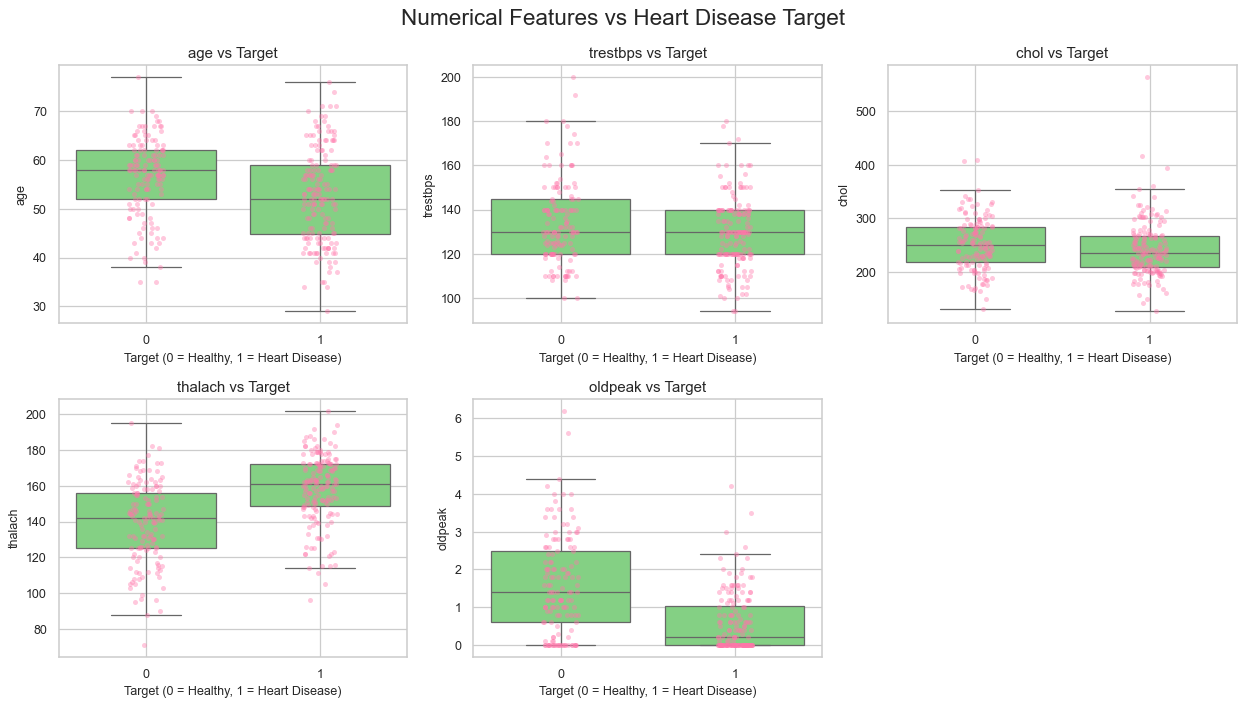

In [288]:

# figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi=90)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    
    # Boxplot (distribution summary)
    sns.boxplot(
        ax=axes[i],
        x=Df['target'],
        y=col,
        data=Df,      
        showfliers=False,
        color="#77dd77"    
    )
    
    # Overlay stripplot (data points)
    sns.stripplot(
        ax=axes[i],
        x=Df['target'],
        y=col,
        data=Df,
        size=4,
        alpha=0.4,
        jitter=True,
        color="#ff77aa"
    )
    axes[i].tick_params(axis='both', labelsize=10) 
    axes[i].set_title(f'{col} vs Target', fontsize=12)
    axes[i].set_xlabel('Target (0 = Healthy, 1 = Heart Disease)',fontsize=10)
    axes[i].set_ylabel(col,fontsize='10')
    axes[i].grid(True)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Numerical Features vs Heart Disease Target', fontsize=18)
plt.tight_layout()
plt.show()


*The box plot analysis reveals varying levels of separation between target groups across numerical variables.*

**Age** *shows a difference in median values between the two target classes. However, there is substantial overlap between the distributions, suggesting a weak to moderate association with heart disease.*

**Thalach** *demonstrates a clearer separation. The median values differ noticeably between the two groups, and the overlap is reduced compared to age. This indicates a stronger potential relationship with the target variable.*

**Oldpeak** *presents the most distinct separation. The median values differ considerably, and the overlap between the groups is limited. This suggests that oldpeak may have a stronger association with the presence of heart disease compared to the other numerical features.*
<font color='firebrick'>

*Overall, **thalach** and especially **oldpeak** appear to have greater discriminative potential, while **age** shows a more moderate effect.*

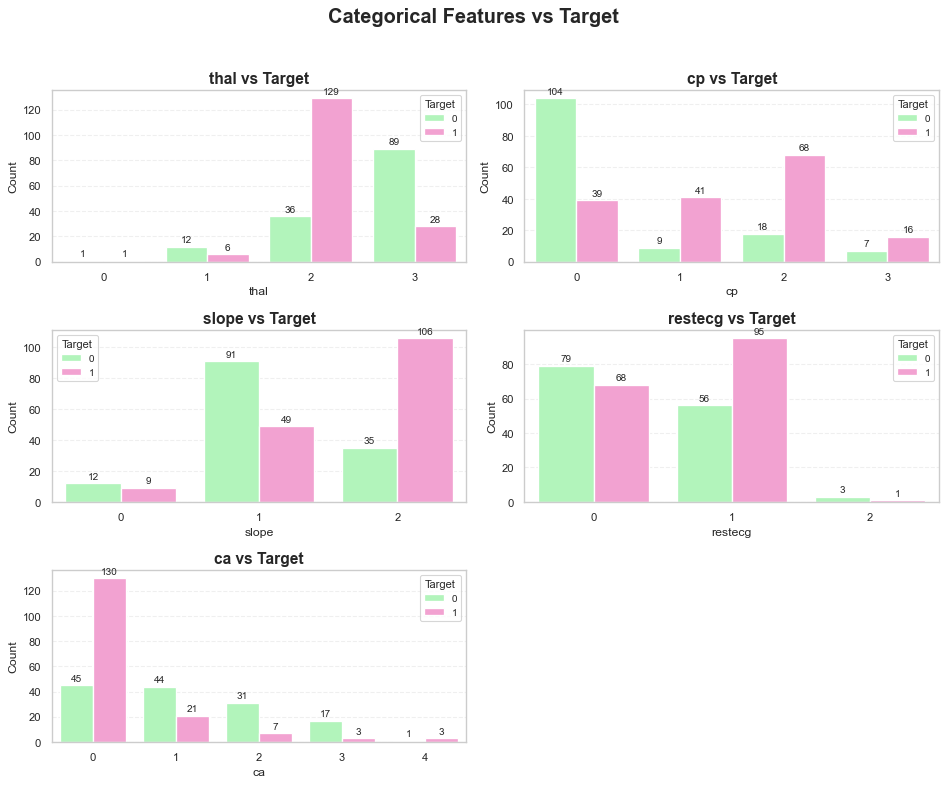

In [287]:
#categorical vs. target

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,10), dpi=80)
ax = ax.flatten()

palette = ["#A7FFB3", "#ff95d3"]

for i, col in enumerate(cat_cols):
    
    g = sns.countplot(data=Df, x=col, hue='target', palette=palette, edgecolor='white', linewidth=1.2, ax=ax[i])
    ax[i].set_title(f"{col} vs Target", fontsize=14, weight='bold')
    ax[i].set_xlabel(col, fontsize=11)
    ax[i].set_ylabel("Count", fontsize=11)
    ax[i].tick_params(axis='both', labelsize=10)
    
    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%d', fontsize=9, padding=2)

    ax[i].grid(axis='y', linestyle='--', alpha=0.3)
    ax[i].legend(title='Target', fontsize=9, title_fontsize=10, frameon=True)
    
for j in range(i+1, len(ax)):
    ax[j].axis('off')

plt.suptitle("Categorical Features vs Target", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


>*Among the categorical features, **slope**, **thal**, and **cp** show noticeable relationships with the target variable.*
*The distribution of patients across categories differs clearly between the two classes.*
**Restecg** *also appears to be related to the target, but the separation is less pronounced, and some of its categories contain only a small number of observations.*


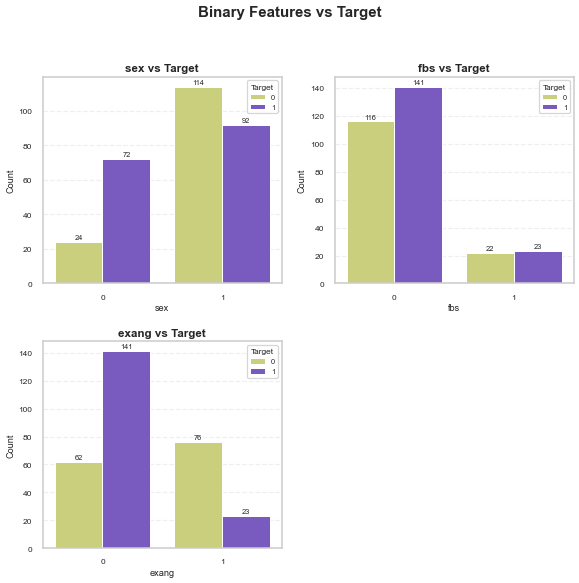

In [276]:
#binary vs. target

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=60)
ax = ax.flatten()

bin_cols_no_target = [col for col in bin_cols if col != 'target']
palette = ["#D6DC71", "#724ad0"]

for i, col in enumerate(bin_cols_no_target):
    g = sns.countplot(data=Df, x=col, hue='target', palette=palette, edgecolor='white', linewidth=1.2, ax=ax[i])
    
    ax[i].set_title(f"{col} vs Target", fontsize=14, weight='bold')
    ax[i].set_xlabel(col, fontsize=11)
    ax[i].set_ylabel("Count", fontsize=11)
    ax[i].tick_params(axis='both', labelsize=10)

    for container in ax[i].containers:
        ax[i].bar_label(container, fmt='%d', fontsize=9, padding=2)

    ax[i].grid(axis='y', linestyle='--', alpha=0.3)
    ax[i].legend(title='Target', fontsize=9, title_fontsize=10, frameon=True)

for j in range(i+1, len(ax)):
    ax[j].axis('off')

plt.suptitle("Binary Features vs Target", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*Among binary features, <font color='lightcoral'>**exang**</font> demonstrates a strong association with the target variable, showing a clear difference in class distribution.*
**Sex** *presents a moderate relationship*, *while **fbs** appears to have a relatively weak association with heart disease*


### *<center><font color='maroon'>Final remarks*



*From the comparison of numerical variables with the target, noticeable differences were observed mainly for thalach and oldpeak. These two variables show clearer separation between patients with and without heart disease, suggesting stronger predictive potential. In contrast, variables such as trestbps and chol do not exhibit substantial differences between the two groups, while age shows some variation but with considerable overlap.*

*The categorical feature analysis indicates that cp, ca, thal, and slope display meaningful distribution differences across the target classes. Certain categories within these variables are more frequently associated with the presence of heart disease, suggesting that they carry important diagnostic information.*

*Among the binary variables, exang demonstrates the most pronounced difference between the two classes, with a noticeably higher occurrence among patients diagnosed with heart disease. Other binary variables such as fbs and sex show comparatively weaker separation.*
<font color='lightpink'>

> *Overall, the analysis suggests that while not all variables contribute equally, features such as oldpeak, thalach, cp, ca, thal, and exang stand out as more informative predictors for heart disease classification.*

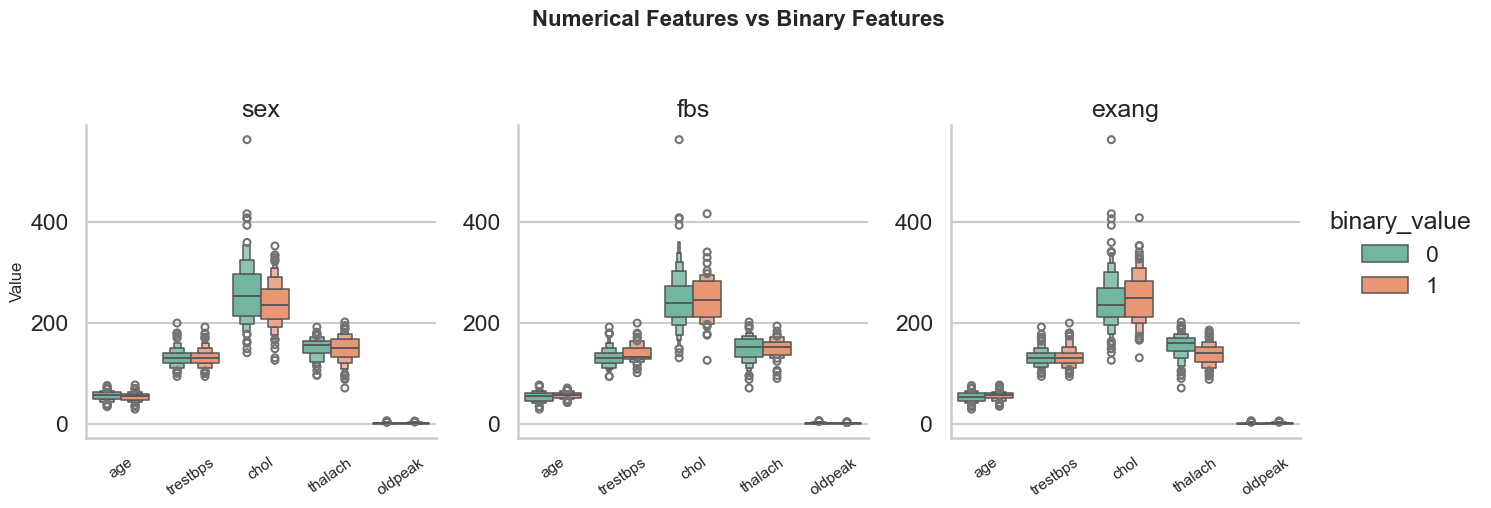

In [296]:

bin_cols_no_target = [c for c in bin_cols if c != "target"]

long = Df.melt(id_vars=bin_cols_no_target,value_vars=num_cols,var_name="feature",value_name="value")
#reshape
long2 = long.melt(id_vars=["feature", "value"],value_vars=bin_cols_no_target,var_name="binary_feature",value_name="binary_value")

g = sns.catplot(data=long2 ,x="feature",y="value",hue="binary_value",col="binary_feature",kind="boxen",height=5,aspect=0.9,palette="Set2",sharey=False)

g.set_titles("{col_name}",fontsize=12)
g.set_axis_labels("", "Value",fontsize=12)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=35, labelsize=11)

plt.suptitle("Numerical Features vs Binary Features", y=1.03,
             fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 0.89, 1])
plt.show()

<font color='lightcoral'>

*The cross-analysis between binary and numerical features reveals a noticeable relationship between **exang**, **thalach**, and **oldpeak**, particularly based on median differences.*

*Since previous analysis identified **thalach** and **oldpeak** as among the most discriminative numerical features with respect to the target variable, the observed association with **exang** further strengthens its potential predictive relevance.*

*Although this does not imply causality, it suggests that **exang** may capture meaningful physiological patterns linked to heart disease.*

</font>

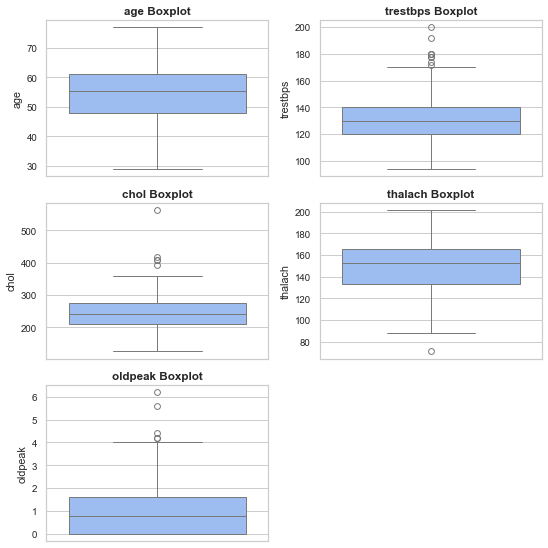

In [285]:
#numericals by their own

fig, ax = plt.subplots(3, 2, figsize=(8, 8),dpi=70)
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=Df[col], ax=ax[i], color="#8fb9fd")
    ax[i].set_title(f"{col} Boxplot", fontsize=12, weight='bold')
    ax[i].set_ylabel(col,fontsize=11)
    ax[i].tick_params(axis='both', labelsize=10)

for j in range(i+1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()


*1) **Age**: median is 55. there is no outlier. data is scattered between 30 and <80. max<65 and min>45 .*

*2) **trestbps**: median is ~130. we have upper outlier. max<145 and min>120 .*

*3) **chol**: median is ~250. we have upper outlier. max>250 and min<250 .*

*4) **thalach**: median is ~155. we have lower outlier. max>160 and min< 130 .*

*5) **oldpeak**: median is ~0.8. we have skewness to the right. upper outlier has been seen. max>1.5 and min<0.5 .*

### *<center><font color='maroon'>Final remarks*

*<font color='lightcoral'>the analysis suggests that while not all variables exhibit strong structural differences, specific features (especially thal, slope, and exang) are more closely associated with variations in key numerical measurements, indicating meaningful interaction patterns within the dataset.*

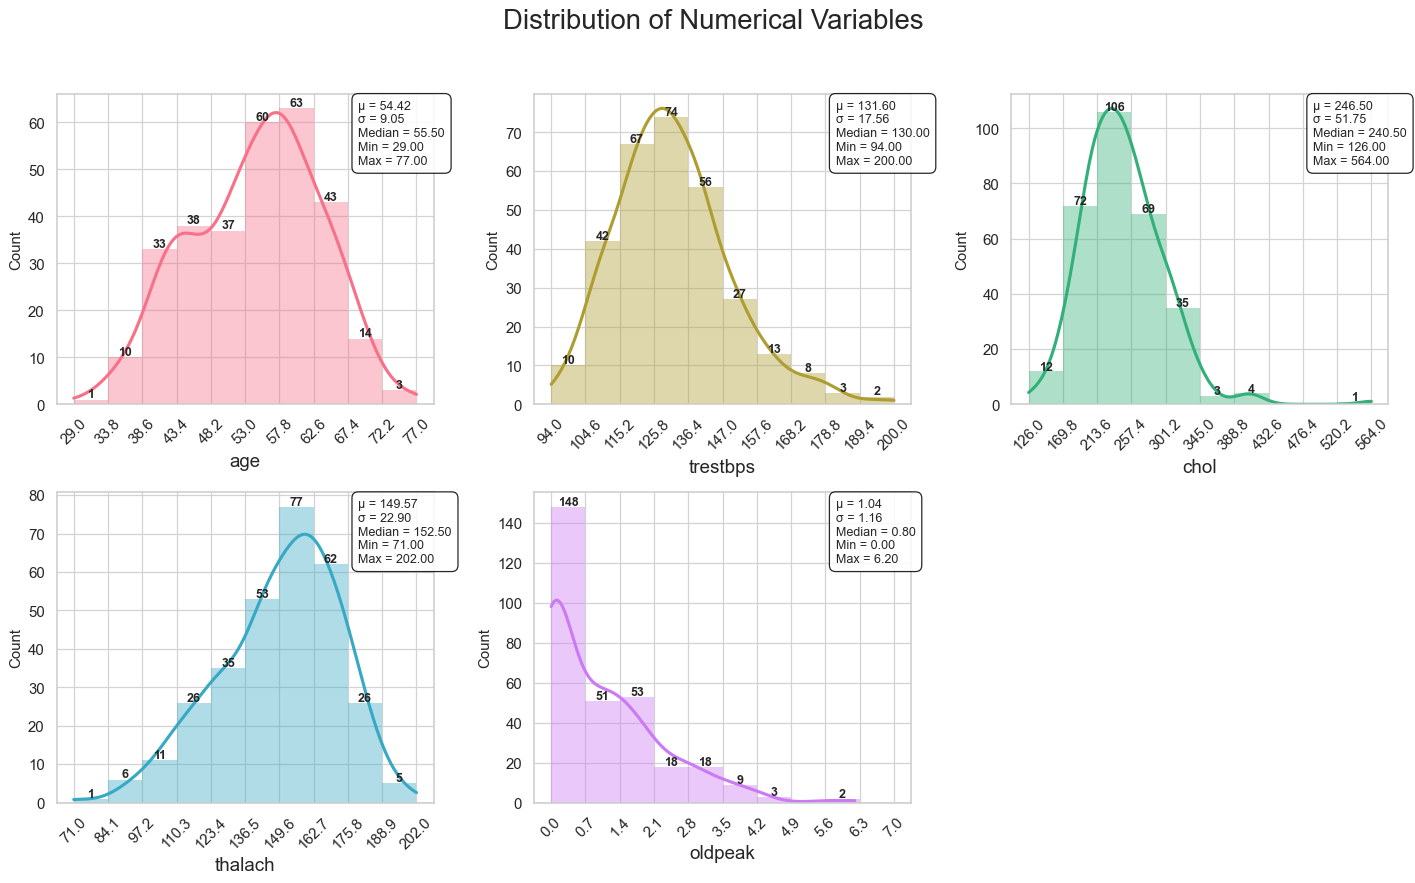

In [284]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), dpi=90)
colors = sns.color_palette("husl", len(num_cols))


for i in range(len(num_cols)):
    row = i // 3
    col = i % 3
    values, bin_edges = np.histogram(Df[num_cols[i]], 
                                     range=(np.floor(Df[num_cols[i]].min()), np.ceil(Df[num_cols[i]].max())))
    
    graph = sns.histplot(data=Df, x=num_cols[i], bins=bin_edges, kde=True, ax=ax[row, col],
                         edgecolor='none', color=colors[i], alpha=0.4, line_kws={'lw': 2.5})
    
    ax[row, col].set_xlabel(num_cols[i], fontsize=15)
    ax[row, col].set_ylabel('Count', fontsize=12)
    ax[row, col].set_xticks(np.round(bin_edges, 1))
    ax[row, col].set_xticklabels(ax[row, col].get_xticks(), rotation=45)
    ax[row, col].grid(color='lightgrey')
    ax[row, col].tick_params(axis='both', labelsize=12)

    for p in graph.patches:
        height = p.get_height()
        if height > 0:
            ax[row, col].annotate(f'{int(height)}',
                                  (p.get_x() + p.get_width() / 2, height + 0.5),
                                  ha='center', fontsize=10, fontweight="bold")

    stats_text = '\n'.join([
        f'μ = {Df[num_cols[i]].mean():.2f}',
        f'σ = {Df[num_cols[i]].std():.2f}',
        f'Median = {np.median(Df[num_cols[i]]):.2f}',
        f'Min = {Df[num_cols[i]].min():.2f}',
        f'Max = {Df[num_cols[i]].max():.2f}'
    ])

    ax[row, col].text(0.8, 0.98, stats_text, transform=ax[row, col].transAxes,fontsize=10, va='top', ha='left',
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.85, pad=0.5))

# Turn off the 6th empty plot
ax[1, 2].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


*1) **Age** exhibits an approximately normal distribution with no significant skewness. The mean and median values are close, indicating a fairly symmetric distribution without extreme outliers.*

*2) **Trestbps** shows slight positive (right) skewness. The mean is marginally higher than the median, suggesting a small number of higher values extending the right tail. However, the skewness is minimal and does not appear to be severe.*

*3) **Chol** demonstrates noticeable positive skewness. The distribution has a longer right tail, and several upper-end outliers are present, indicating that some patients have considerably higher cholesterol levels compared to the majority.*

*4) **Thalach** displays slight negative (left) skewness. The median is slightly higher than the mean, suggesting a mild left tail. Nevertheless, the distribution remains relatively symmetric overall.*

*5) **Oldpeak** exhibits strong positive skewness. Most observations are concentrated near lower values, while a small number of high values create a long right tail. This indicates substantial asymmetry in its distribution.*

In [280]:
for col in num_cols:
    Q1 = Df[col].quantile(0.25)
    Q3 = Df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    lower_outliers = (Df[col] < lower).sum()
    upper_outliers = (Df[col] > upper).sum()

    print(f"{col}:")
    print(f"  Lower outliers: {lower_outliers}")
    print(f"  Upper outliers: {upper_outliers}")
    print("-" * 40)


age:
  Lower outliers: 0
  Upper outliers: 0
----------------------------------------
trestbps:
  Lower outliers: 0
  Upper outliers: 9
----------------------------------------
chol:
  Lower outliers: 0
  Upper outliers: 5
----------------------------------------
thalach:
  Lower outliers: 1
  Upper outliers: 0
----------------------------------------
oldpeak:
  Lower outliers: 0
  Upper outliers: 5
----------------------------------------


*Boxplots were used to detect outliers in the numerical variables. No outliers were observed in age. However, upper outliers were detected in trestbps (9), chol (5), and oldpeak (5), while thalach showed one lower outlier.*

*Since the dataset is medical, these extreme values may represent real clinical conditions rather than errors. Therefore, two modeling approaches will be applied: one using the full dataset (with outliers) and another after removing the detected outliers. Model performance will be compared using evaluation metrics, and the final decision will be based on which approach achieves better predictive accuracy and generalization.*

# *<center><font color='firebrick'>correlation*

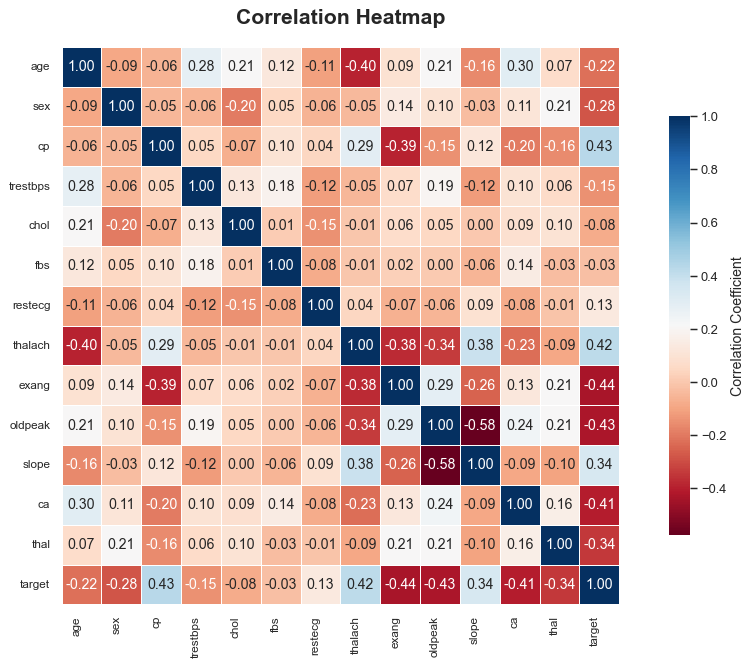

In [283]:
numeric_df = Df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8),dpi=85)
sns.set_theme(style="whitegrid")


heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="RdBu",
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='white', 
    square=True, 
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"}
);

plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


sns.despine(left=True, bottom=True);

plt.tight_layout()
plt.show()


In [282]:
corr_table = Df.select_dtypes(include='number').corr()
corr_table.round(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07,-0.22
sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
chol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10,-0.08
fbs,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21,-0.43


### *<center><font color='maroon'>Final remarks*

<font color='lightcoral'>

#### *Correlation analysis indicates that **exang**, **oldpeak**, **cp**, **thalach**, and **ca** exhibit the strongest relationships with the target variable. No severe multicollinearity is observed among numerical features. These findings are consistent with earlier exploratory data analysis.*